![rmotr](https://i.imgur.com/jiPp4hj.png)
<hr style="margin-bottom: 40px;">

<div style="position: relative;">
    <img src="https://archive.ics.uci.edu/ml/assets/MLimages/Large2.jpg"
        style="float: right; margin: 0 40px 40px 40px;"></img>

    <h1>
        Project assignment: US Census Analysis
    </h1>

    <p>We will be working with an extraction of data done by Barry Becker from the 1994 Census database.</p>
</div>

<i>
> Dataset source: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data <br>
> Dataset description: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
</i>

### Dataset attribute information

- **age**: continuous.
- **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- **fnlwgt**: continuous, sampling weight of the person.
- **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- **education-num**: continuous.
- **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- **sex**: Female, Male.
- **capital-gain**: continuous, income from investment sources, apart from wages/salary.
- **capital-loss**: continuous, losses from investment sources, apart from wages/salary.
- **hours-per-week**: continuous.
- **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- **income**: continuous.

![separator2](https://i.imgur.com/4gX5WFr.png)

### Hands on! 

On that section you will analyze the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize': (18, 6)})

import warnings
warnings.filterwarnings('ignore')

<table style="width: 100%">
    <tr>
        <td width="80"><img src="https://i.imgur.com/skQuxIq.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">1.</span>
            Load the dataset `census-data.csv` as a Pandas dataframe on a variable called `df`.
        </td>
    </tr>
</table>

> ⚠️ <i>Be aware of how the data is separated (space + comma) and if has header, use the `engine='python'` param.</i>

In [2]:
# Your code goes here

df = pd.read_table('census-data.csv', sep=', ', engine='python', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


![separator1](https://i.imgur.com/ZUWYTii.png)

<table style="width: 100%">
    <tr>
        <td width="80"><img src="https://i.imgur.com/skQuxIq.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">2.</span>
            Update the column names of the dataframe with the attribute names.
        </td>
    </tr>
</table>

In [3]:
# Your code goes here

col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
             'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
             'hours-per-week', 'native-country', 'income']

df.columns = col_names

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


![separator1](https://i.imgur.com/ZUWYTii.png)

<table style="width: 100%">
    <tr>
        <td width="80"><img src="https://i.imgur.com/skQuxIq.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">3.</span>
            Check if there is any null value on the dataframe.
        </td>
    </tr>
</table>

> ⚠️ <i>Sometimes null values are represented by special characters, check <b>unique values</b> to find them. Then replace them with None.</i>

In [4]:
# first attemp, check only null values
df.isnull().sum()

# null proportion
df.isnull().sum() / len(df)

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
income            0.0
dtype: float64

In [5]:
# second attempt, checking rare values

df.loc[:, 'age'].unique()

# it's ok, no null values

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87])

In [6]:
df.loc[:, 'workclass'].unique()

# it seems to be a '?' character to represent null values!

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [7]:
df.loc[:, 'occupation'].unique()

# it seems to be a '?' character to represent null values!

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [8]:
df.loc[:, 'native-country'].unique()

# it seems to be a '?' character to represent null values!

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [9]:
# change '?' values with None (null) values
df = df.replace({
    'workclass': { '?': None },
    'occupation': { '?': None },
    'native-country': { '?': None }
})

# another complex solution
#df = df.applymap(lambda x: None if x == '?' else x)

![separator1](https://i.imgur.com/ZUWYTii.png)

<table style="width: 100%">
    <tr>
        <td width="80"><img src="https://i.imgur.com/skQuxIq.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">4.</span>
            Remove the rows that contains any null value.
        </td>
    </tr>
</table>

In [10]:
# check null values again, now we have null values!
df.isnull().sum()
df.isnull().sum() / len(df)

age               0.000000
workclass         0.056386
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        0.056601
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    0.017905
income            0.000000
dtype: float64

In [11]:
# remove all the rows with null values
df = df.dropna(axis=0, how='any')

# check null values again, now all null values were removed!
df.isnull().sum()
df.isnull().sum() / len(df)

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
income            0.0
dtype: float64

![separator1](https://i.imgur.com/ZUWYTii.png)

<table style="width: 100%">
    <tr>
        <td width="80"><img src="https://i.imgur.com/skQuxIq.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">5.</span>
            Show <b>basic descriptive statistics</b> and <b>correlations</b> of the data.
        </td>
    </tr>
</table>

In [12]:
# basic descriptive statistics
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [13]:
# correlations
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076511,0.043526,0.080154,0.060165,0.101599
fnlwgt,-0.076511,1.000000,-0.044992,0.000422,-0.009750,-0.022886
education-num,0.043526,-0.044992,1.000000,0.124416,0.079646,0.152522
capital-gain,0.080154,0.000422,0.124416,1.000000,-0.032229,0.080432
capital-loss,0.060165,-0.009750,0.079646,-0.032229,1.000000,0.052417
hours-per-week,0.101599,-0.022886,0.152522,0.080432,0.052417,1.000000


![separator1](https://i.imgur.com/ZUWYTii.png)

<table style="width: 100%">
    <tr>
        <td width="80"><img src="https://i.imgur.com/skQuxIq.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">6.</span>
            Convert `income` column to <b>category</b> type, then check how many bytes it takes in memory.
        </td>
    </tr>
</table>

In [14]:
# Your code goes here

df['income_binary'] = df['income'].astype('category')
df['income'].nbytes

241296

![separator1](https://i.imgur.com/ZUWYTii.png)

<table style="width: 100%">
    <tr>
        <td width="80"><img src="https://i.imgur.com/skQuxIq.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">7.</span>
            Plot a <b>counterplot</b> with `income` on x-axis and hue it by `sex`.
        </td>
    </tr>
</table>

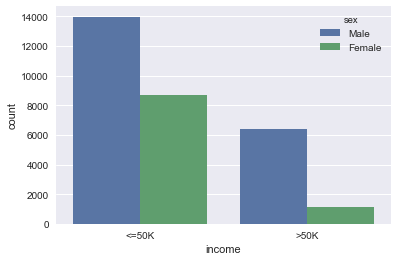

In [15]:
sns.countplot(x='income', hue='sex', data=df)

![separator1](https://i.imgur.com/ZUWYTii.png)

<table style="width: 100%">
    <tr>
        <td width="80"><img src="https://i.imgur.com/skQuxIq.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">8.</span>
            Plot a **counterplot** showing how many people are of each `occupation`.
        </td>
    </tr>
</table>

> ⚠️ <i>To order the columns you should use a `order` parameter with the index of each ordered column.
    <br>
    In this case you should use `order=df['occupation'].value_counts().index`.</i>

In [16]:
# Your code goes here

sns.countplot(data=dff, x='occupation', order=df['occupation'].value_counts().index)

NameError: name 'dff' is not defined

![separator1](https://i.imgur.com/ZUWYTii.png)

<table style="width: 100%">
    <tr>
        <td width="80"><img src="https://i.imgur.com/skQuxIq.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">9.</span>
            Plot a **distplot** showing the distribution of `hours-per-week`.
        </td>
    </tr>
</table>

In [ ]:
# Your code goes here

sns.distplot(df['hours-per-week'])

![separator1](https://i.imgur.com/ZUWYTii.png)

<table style="width: 100%">
    <tr>
        <td width="80"><img src="https://i.imgur.com/skQuxIq.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">10.</span>
            Plot a **boxplot** showing the distribution of `hours-per-week`.
        </td>
    </tr>
</table>

In [ ]:
# Your code goes here

sns.boxplot(data=df, x='hours-per-week')

![separator1](https://i.imgur.com/ZUWYTii.png)

<table style="width: 100%">
    <tr>
        <td width="80"><img src="https://i.imgur.com/skQuxIq.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">11.</span>
            Create a dummy variable _"makes more than 50K"_ or _"make less than 50K"_.
        </td>
    </tr>
</table>

In [ ]:
# Your code goes here

pd.get_dummies(df['income']).head()
dff = pd.concat([df, pd.get_dummies(df['income'])], axis=1)
dff.head()

![separator1](https://i.imgur.com/ZUWYTii.png)

<table style="width: 100%">
    <tr>
        <td width="80"><img src="https://i.imgur.com/skQuxIq.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">12.</span>
            Plot a **factorplot** showing `occupation` on x-axis, and people that have `>50K` of income on y-axis.
        </td>
    </tr>
</table>

> ⚠️ <i>Use the dummy column `>50K` on y-axis.</i>

> ⚠️ <i>Use `kind='bar'`, size=6` and `aspect=3` parameters on `factorplot`.</i>

In [ ]:
sns.factorplot(data=dff, x='occupation', y='>50K', kind='bar', size=6, aspect=3)

![separator1](https://i.imgur.com/ZUWYTii.png)

<table style="width: 100%">
    <tr>
        <td width="80"><img src="https://i.imgur.com/skQuxIq.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">13.</span>
            Create a new column `income_binary` that has values `0` for people making `<=50k` and `1` with `>50k`.
        </td>
    </tr>
</table>

In [ ]:
# Your code goes here

df['income_binary'] = np.nan
df.loc[df['income'] == '>50K', 'income_binary'] = 1
df['income_binary'].fillna(0, inplace=True)

df.head()

![separator1](https://i.imgur.com/ZUWYTii.png)

<table style="width: 100%">
    <tr>
        <td width="80"><img src="https://i.imgur.com/skQuxIq.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">14.</span>
            List people that work more than 20 hours per week. How many are?
        </td>
    </tr>
</table>

In [ ]:
df.loc[df['hours-per-week'] > 20]

In [ ]:
df.loc[df['hours-per-week'] > 20].count()

![separator1](https://i.imgur.com/ZUWYTii.png)

<table style="width: 100%">
    <tr>
        <td width="80"><img src="https://i.imgur.com/skQuxIq.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">15.</span>
            How many men and women are? Show totals and proportion over all the data.
        </td>
    </tr>
</table>

In [ ]:
# count how many male and female are
num_male = df.loc[df["sex"] == 'Male', :].sex.count()
print("Male count: {}".format(num_male))

num_female = df.loc[df["sex"] == 'Female', :].sex.count()
print("Female count: {}".format(num_female))

In [ ]:
# proportion of male and female
total_rows = df.shape[0]

male_prop = num_male/total_rows
print("Male proportion: {}".format(male_prop))

female_prop = num_female/total_rows
print("Female proportion: {}".format(female_prop))

![separator2](https://i.imgur.com/4gX5WFr.png)